## Data Analysis For Previous Application Data

Analysis Steps:
- Load Previous application Data and Application data from earlier analysis
    1. Importing libraries and loading data files
    2. Data inspection
- Data Cleaning and manipulations on Previous Application Data
- Merging the files and data inspection
- Data Analysis on Merged Data
    1. Univariate analysis of Categorical and numeric variables
    2. Segmented univariate Analysis
    3. Bivariate Analysis
    4. Multivariate Analysis
- Final Conclusion

## 1. Import Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
# To visualize
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## 2. Data Loading

In [4]:
# Read data from file new_data.csv (created from last file)
new_app_data = pd.read_csv("C:/Users/hp/Downloads/New_Data.csv")
#new_app_data = pd.read_csv("New_Data.csv")
new_app_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_GROUP,ANNUITY_RANGE
0,0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,91,3648,2120,Laborers,1.0,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,High,25,"(20, 25]",VeryLow
1,1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,"(40, 45]",VeryLow
2,2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,32,4260,2531,Laborers,1.0,MONDAY,9,N,N,N,N,N,N,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,VeryLow,52,"(50, 55]",VeryLow
3,3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,434,9833,2437,Laborers,2.0,WEDNESDAY,17,N,N,N,N,N,N,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,NaN,Medium,Medium,52,"(50, 55]",VeryLow
4,4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,434,4311,3458,Core staff,1.0,THURSDAY,11,N,N,N,N,Y,Y,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,54,"(50, 55]",VeryLow


In [5]:
# Read data from file previous_application.csv
prev_data = pd.read_csv("C:/Users/hp/Downloads/previous_application.csv")
#prev_data = pd.read_csv("previous_application.csv")
# Preview the first 5 lines of the application data
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 Data Inspection

In [6]:
#Checking the number of rows and columns
prev_data.shape

(1670214, 37)

In [7]:
#View Summary of all the numeric columns in the dataset
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [8]:
#Checking Datatypes of each column
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
#Checking Column-wise null count 
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### 2.2 Data Cleaning

In [10]:
#Checking Percentage of missing values for all columns and storing in a dataframe
missing_values = round(100*(prev_data.isnull().sum()/len(prev_data.index)),2)
missing_values

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [11]:
#Columns with high missing percentage >=40% 
missing_values = missing_values[missing_values >= 40]
missing_values

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [12]:
#Storing the names of columns in dropped_col and Dropping those columns with missing values more than 50%
dropped_col = ([missing_values[missing_values >=40.00].index])
prev_data.drop(labels=dropped_col[0],axis=1,inplace=True)

In [13]:
#Checking the number of rows and columns
prev_data.shape

(1670214, 26)

In [14]:
# Negative values
#('DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION')

In [17]:
# Checking values og AGE_GROUP Column

new_app_data.AGE_GROUP.value_counts()

(35, 40]        42990
(40, 45]        38986
(30, 35]        38972
(25, 30]        36135
(45, 50]        32574
(50, 55]        27974
(20, 25]        16242
(55, 60]        11833
(60, 65]         3891
(65, 70]          500
(35.0, 40.0]      363
(30.0, 35.0]      319
(40.0, 45.0]      315
(25.0, 30.0]      299
(50.0, 55.0]      259
(45.0, 50.0]      233
(20.0, 25.0]      115
(55.0, 60.0]       99
(60.0, 65.0]       33
(65.0, 70.0]        4
Name: AGE_GROUP, dtype: int64

In [18]:
new_app_data.drop('AGE_GROUP',axis=1,inplace=True)

In [19]:
new_app_data.AGE.describe()

count    252137.000000
mean         39.934774
std          10.025779
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [21]:
# Creating AGE_GROUP Column again

#Since the AGE varies from 21 to 68, we can create bins of 5 years starting from 20 to 70
new_app_data['AGE_GROUP'] = pd.cut(new_app_data['AGE'],bins=np.arange(20,71,5))

In [22]:
new_app_data.AGE_GROUP.value_counts()

(35, 40]    43353
(40, 45]    39301
(30, 35]    39291
(25, 30]    36434
(45, 50]    32807
(50, 55]    28233
(20, 25]    16357
(55, 60]    11932
(60, 65]     3924
(65, 70]      504
Name: AGE_GROUP, dtype: int64

## 3. Merging the files & Analyzing the data

In [23]:
# Now merging the Application dataset with previous appliaction dataset
new_data = pd.merge(new_app_data, prev_data, how='left', on=['SK_ID_CURR'])
new_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,ANNUITY_RANGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,91,3648,2120,Laborers,1.0,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,High,High,25,VeryLow,"(20, 25]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,VeryLow,"(40, 45]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,VeryLow,"(40, 45]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,169,1186,291,Core staff,2.0,MONDAY,11,N,N,N,N,N,N,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,VeryLow,"(40, 45]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,32,4260,2531,Laborers,1.0,MONDAY,9,N,N,N,N,N,N,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,VeryLow,52,VeryLow,"(50, 55]",1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / L

### 3.1 Data Inspection

In [24]:
#Checking the number of rows and columns
new_data.shape

(1153787, 75)

In [25]:
#Checking Datatypes of each column
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153787 entries, 0 to 1153786
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   Unnamed: 0                    1153787 non-null  int64   
 1   SK_ID_CURR                    1153787 non-null  int64   
 2   TARGET                        1153787 non-null  int64   
 3   NAME_CONTRACT_TYPE_x          1153787 non-null  object  
 4   CODE_GENDER                   1153787 non-null  object  
 5   FLAG_OWN_CAR                  1153787 non-null  object  
 6   FLAG_OWN_REALTY               1153787 non-null  object  
 7   CNT_CHILDREN                  1153787 non-null  int64   
 8   AMT_INCOME_TOTAL              1153787 non-null  float64 
 9   AMT_CREDIT_x                  1153787 non-null  float64 
 10  AMT_ANNUITY_x                 1153787 non-null  float64 
 11  AMT_GOODS_PRICE_x             1153787 non-null  float64 
 12  NAME_TYPE_SUIT

In [26]:
#View Summary of all the numeric columns in the dataset
new_data.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.151024e+06,1.151024e+06,1.151024e+06,1.151024e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.153787e+06,1.020994e+06,1.153787e+06,1.140118e+06,896395.000000,1.140118e+06,1.140118e+06,8.876520e+05,1.140118e+06,1.140118e+06,1.140118e+06,1.140118e+06,896399.000000
mean,1.539654e+05,2.784233e+05,9.288456e-02,4.909502e-01,1.802120e+05,6.010612e+05,2.779005e+04,5.396857e+05,2.078815e-02,1.497762e+04,3.499525e+02,4.636836e+03,2.828923e+03,2.258712e+00,1.213431e+01,5.132123e-01,1.538692e+00,1.500620e-01,1.520647e+00,1.051064e-01,1.081149e+03,5.669157e-03,6.196118e-03,3.391094e-02,2.808274e-01,3.084867e-01,2.780455e+00,4.050542e+01,1.922484e+06,15871.655683,1.737888e+05,1.956659e+05,2.232550e+05,1.265568e+01,9.963442e-01,-8.858701e+02,3.237863e+02,15.533526
std,8.879743e+04,1.028203e+05,2.902707e-01,7.620474e-01,2.170783e+05,3.886951e+05,1.411785e+04,3.568798e+05,1.337919e-02,3.636710e+03,3.308429e+02,3.275291e+03,1.516481e+03,9.324097e-01,3.272816e+00,1.898675e-01,2.523254e+00,4.591976e-01,2.501078e+00,3.726080e-01,8.057332e+02,7.847792e-02,1.046950e-01,1.996004e-01,9.544294e-01,9.048282e-01,2.147315e+00,9.956391e+00,5.326710e+05,14995.310848,2.967152e+05,3.229700e+05,3.194728e+05,3.359873e+00,6.035230e-02,7.834204e+02,6.682626e+03,14.328991
min,0.000000e+00,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.980000e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.173617e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000001e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000
25%,7.698300e+04,1.892690e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.844000e+05,1.744650e+04,2.475000e+05,1.003200e-02,1.200500e+04,1.200000e+02,1.827000e+03,1.529000e+03,2.000000e+00,1.000000e+01,3.953236e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.890000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.200000e+01,1.461178e+06,6135.075000,2.065500e+04,2.578050e+04,4.806000e+04,1.000000e+01,1.000000e+00,-1.322000e+03,-1.000000e+00,6.000000
50%,1.542600e+05,2.787820e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.212800e+05,2.596050e+04,4.500000e+05,1.885000e-02,1.479100e+04,2.500000e+02,4.256000e+03,2.941000e+03,2.000000e+00,1.200000e+01,5.636179e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.930000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+01,1.922130e+06,11071.755000,6.880050e+04,7.863750e+04,1.049400e+05,1.300000e+01,1.000000e+00,-5.910000e+02,1.000000e+01,12.000000
75%,2.310050e+05,3.675660e+05,0.000000e+00,1.000000e+00,2.250000e+05,8.100000e+05,3.555450e+04,6.885000e+05,2.866300e-02,1.771100e+04,4.640000e+02,6.966000e+03,4.193000e+03,3.000000e+00,1.500000e+01,6.607849e-01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

### 3.2 Data Cleaning & Manipulation

In [27]:
# Removing the column values of 'XNA' and 'XAP'
new_data=new_data.drop(new_data[new_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
new_data=new_data.drop(new_data[new_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
new_data=new_data.drop(new_data[new_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

new_data.shape

(65089, 75)

In [28]:
# Renaming some column names after merging
new_data = new_data.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT_PREV','AMT_ANNUITY_x':'AMT_ANNUITY_PREV',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_PREV'
                         }, axis=1)

In [29]:
new_data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,AMT_GOODS_PRICE_PREV,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,ANNUITY_RANGE,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
63,20,100024,0,Revolving loans,Male,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,18252,612,298,1800,Laborers,2.0,FRIDAY,13,N,N,N,N,N,N,Self-employed,0.113375,0.0,0.0,0.0,0.0,296.0,0.0,0.0,0.0,0.0,0.0,NaN,Medium,Medium,49,VeryLow,"(45, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,26,100031,1,Cash loans,Female,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,375,6573,1827,Cooking staff,1.0,MONDAY,9,N,N,N,N,N,N,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,Low,51,VeryLow,"(50, 55]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,29,100034,0,Revolving loans,Male,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,144,4799,3015,Laborers,1.0,TUESDAY,16,N,N,N,N,N,N,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,599.0,0.0,0.0,0.0,0.0,0.0,NaN,VeryLow,VeryLow,28,VeryLow,"(25, 30]",1390369.0,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11.0,Y,1.0,Other,Approved,-599.0,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,6.0,high,Cash Street: high
103,30,100035,0,Cash loans,Female,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,381,5266,3787,NaN,2.0,WEDNESDAY,13,N,N,N,N,N,N,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,VeryHigh,VeryHigh,41,VeryLow,"(40, 45]",1344613.0,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14.0,Y,1.0,Payments on other loans,Refused,-119.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_action,Cash Street: low
129,33,100039,0,Cash loans,Male,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,294,3557,3557,Drivers,3.0,THURSDAY,10,N,N,N,Y,Y,N,Self-employed,0.321745,2.0,0.0,2.0,0.0,697.0,0.0,0.0,0.0,0.0,1.0,1.0,VeryHigh,VeryHigh,32,VeryLow,"(30, 35]",1077565.0,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14.0,Y,1.0,Buying a used car,Approved,-695.0,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1.0,XNA,42.0,low_normal,Cash Street: low


### 3.3 Data Analysis

#### 3.3.1 Univariate Analysis

#### NAME_CONTRACT_STATUS

In [33]:
# Checking column values and count

new_data.NAME_CONTRACT_STATUS.value_counts()

Refused         30508
Approved        19553
Canceled         1199
Unused offer      160
Name: NAME_CONTRACT_STATUS, dtype: int64

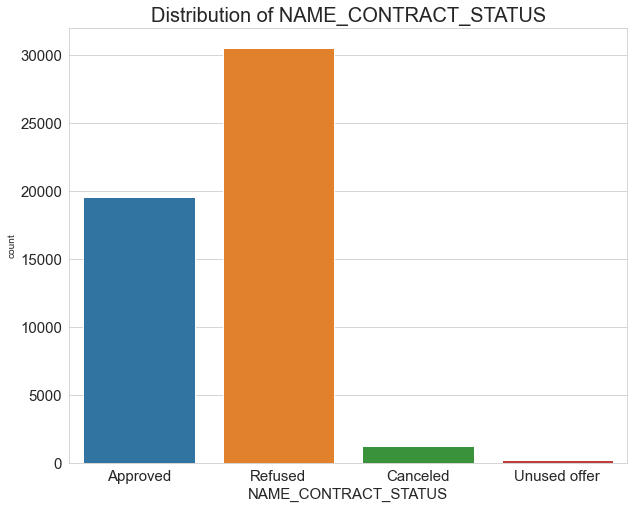

In [34]:
# Checking countplot for NAME_CONTRACT_STATUS

plt.figure(figsize = (10,8))
sns.set_style("whitegrid")
plt.xticks(size = 15)
plt.yticks(size = 15)
run_plot = sns.countplot(new_data.NAME_CONTRACT_STATUS)
run_plot.set_xlabel('NAME_CONTRACT_STATUS', fontsize = 15)
run_plot.set_title('Distribution of NAME_CONTRACT_STATUS', fontsize = 20)
plt.show()

Inference:
1. Count of Refused applications is more in merged data
2. Unused offer have lowest count

#### CHANNEL_TYPE

In [35]:
# Checking column values and count

new_data.CHANNEL_TYPE.value_counts()

Credit and cash offices       36401
AP+ (Cash loan)                6069
Country-wide                   3826
Channel of corporate sales     2705
Contact center                 2236
Stone                            92
Regional / Local                 91
Name: CHANNEL_TYPE, dtype: int64

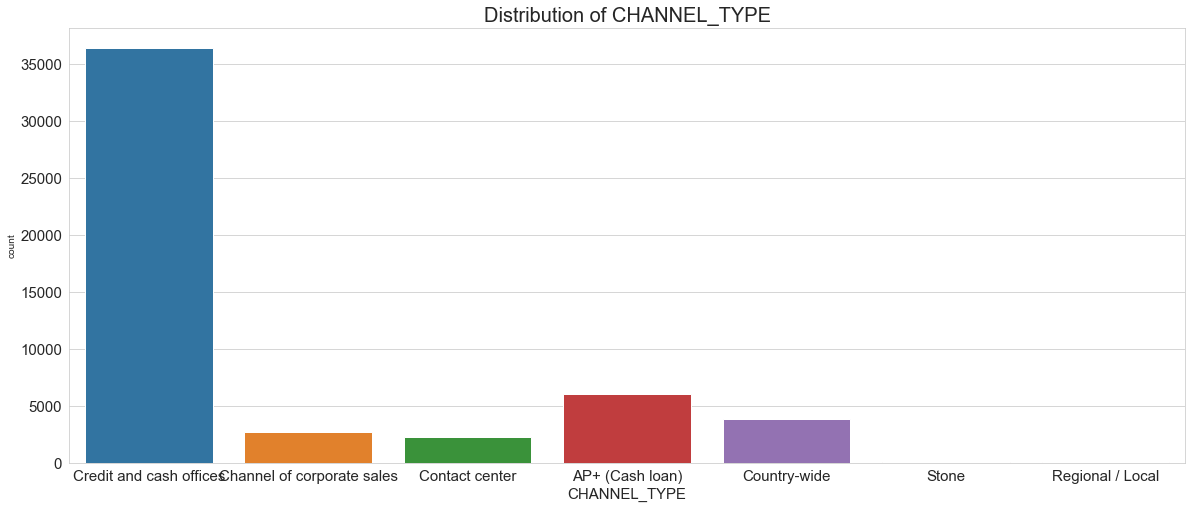

In [36]:
# Checking countplot for CHANNEL_TYPE

plt.figure(figsize = (20,8))
sns.set_style("whitegrid")
plt.xticks(size = 15)
plt.yticks(size = 15)
run_plot = sns.countplot(new_data.CHANNEL_TYPE)
run_plot.set_xlabel('CHANNEL_TYPE', fontsize = 15)
run_plot.set_title('Distribution of CHANNEL_TYPE', fontsize = 20)
plt.show()

Inference:

1. Count of Channel Type 'Credit & Cash Office' is maximum as compared to all others.

In [37]:
# Checking column values and count

new_data.NAME_CONTRACT_STATUS.value_counts()

Refused         30508
Approved        19553
Canceled         1199
Unused offer      160
Name: NAME_CONTRACT_STATUS, dtype: int64

In [38]:
# function to count plot for categorical variables
def count_plot(col):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    sns.countplot(x = col, data = new_data,ax = ax,hue ='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Count', size = 15)
    ax.set_title(f'Distribution of {col}',fontsize=20)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
    for p in ax.patches:
        #ax.annotate('{:.1f}%'.format((p.get_height()/len(new_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(new_data), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
    plt.show()

#### NAME_CONTRACT_TYPE

In [39]:
# Checking column values and count

new_data.NAME_CONTRACT_TYPE_PREV.value_counts(normalize = True)

Cash loans         0.91378
Revolving loans    0.08622
Name: NAME_CONTRACT_TYPE_PREV, dtype: float64

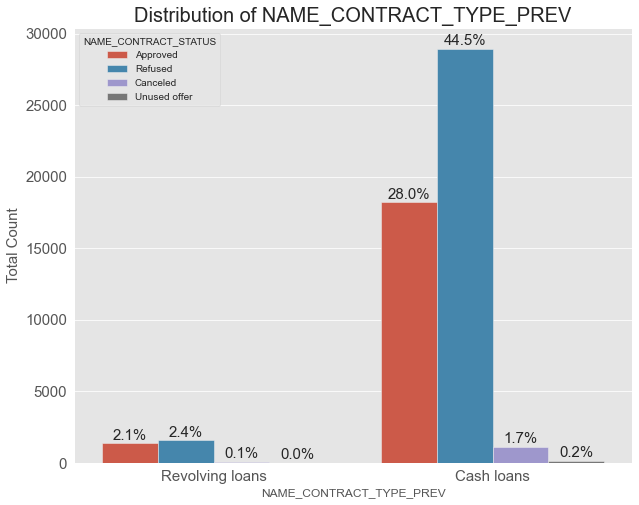

In [40]:
# Ploting count plot for better visualization

count_plot('NAME_CONTRACT_TYPE_PREV')

From the graph, we can say that:

1. People with Name_Contract_Type as 'Cash Loans' have a greater percentage of Loan Refusal as compared to their Loan Approval applications.
2. Whereas people with Name_Contract_Type as 'Revolving Loans' do not have much difference in their Loan approval & Loan refusal applications.

#### NAME_CLIENT_TYPE

In [41]:
# Checking column values and count

prev_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

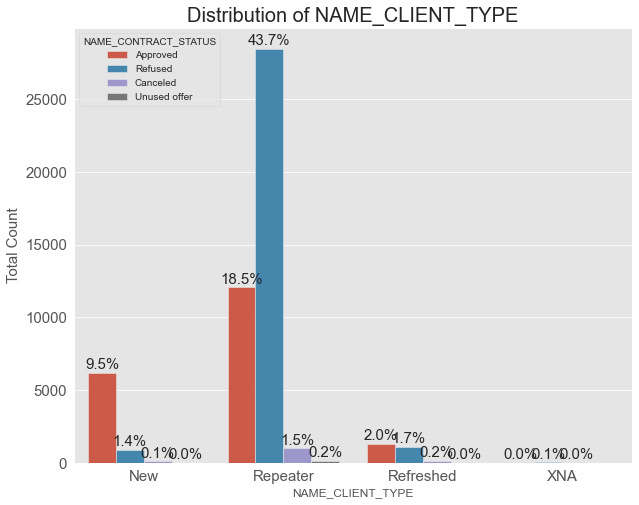

In [30]:
# Ploting count plot for better visualization

count_plot('NAME_CLIENT_TYPE')

From the graph, we can say that: 

1. People who are already connected with bank, 'Repeater' have more Loan refusal applications.
2. Whereas 'New' members of the bank have very less Loan Refusal percentage.

#### 3.3.2 Segmented Univariate

In [31]:
# Box plotting definition

def box_plot(col1, col2):
    plt.figure(figsize=(10,10))

    plt.xticks(size = 15)
    plt.yticks(size = 15)
    sns.boxplot(data = new_data, x = col1, y = col2, orient='v')
    plt.title(f'{col1} vs {col2}', fontsize = 20)

    plt.show()

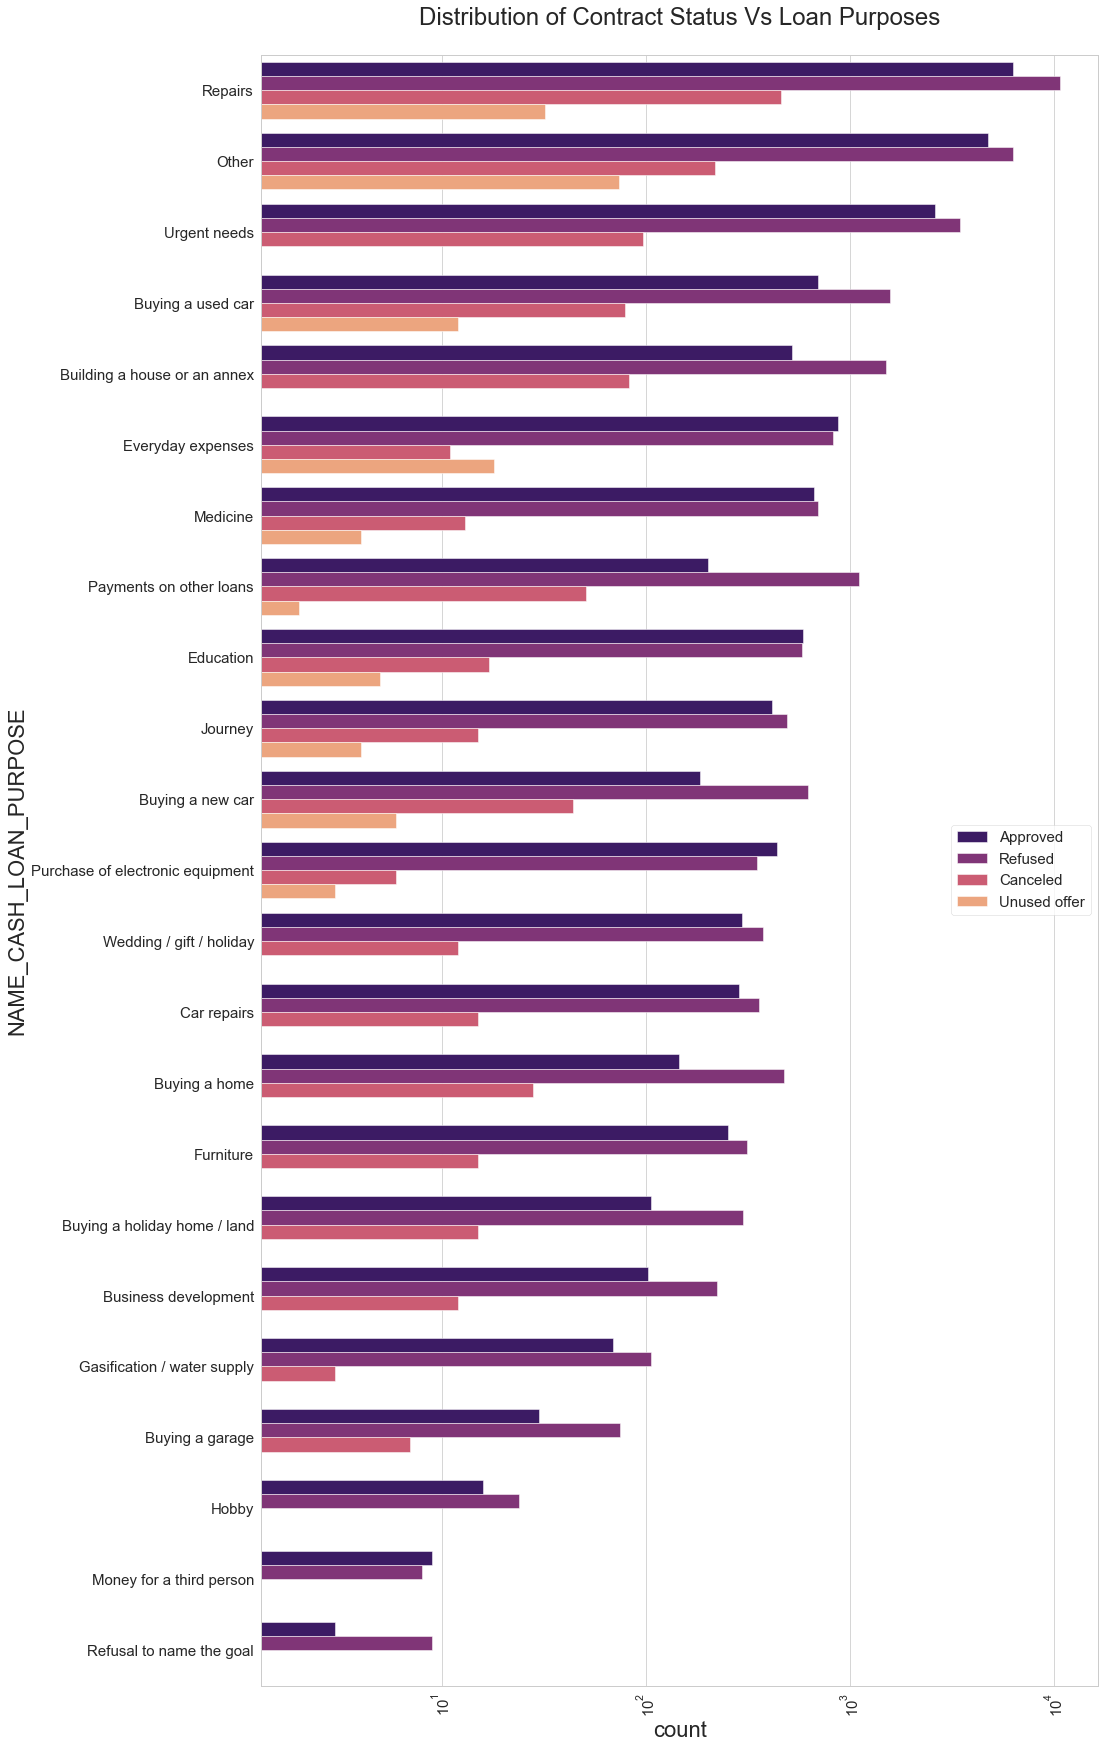

In [34]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xscale('log')
plt.title('Distribution of Contract Status Vs Loan Purposes')
ax = sns.countplot(data = new_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize=15)

plt.show()

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approves

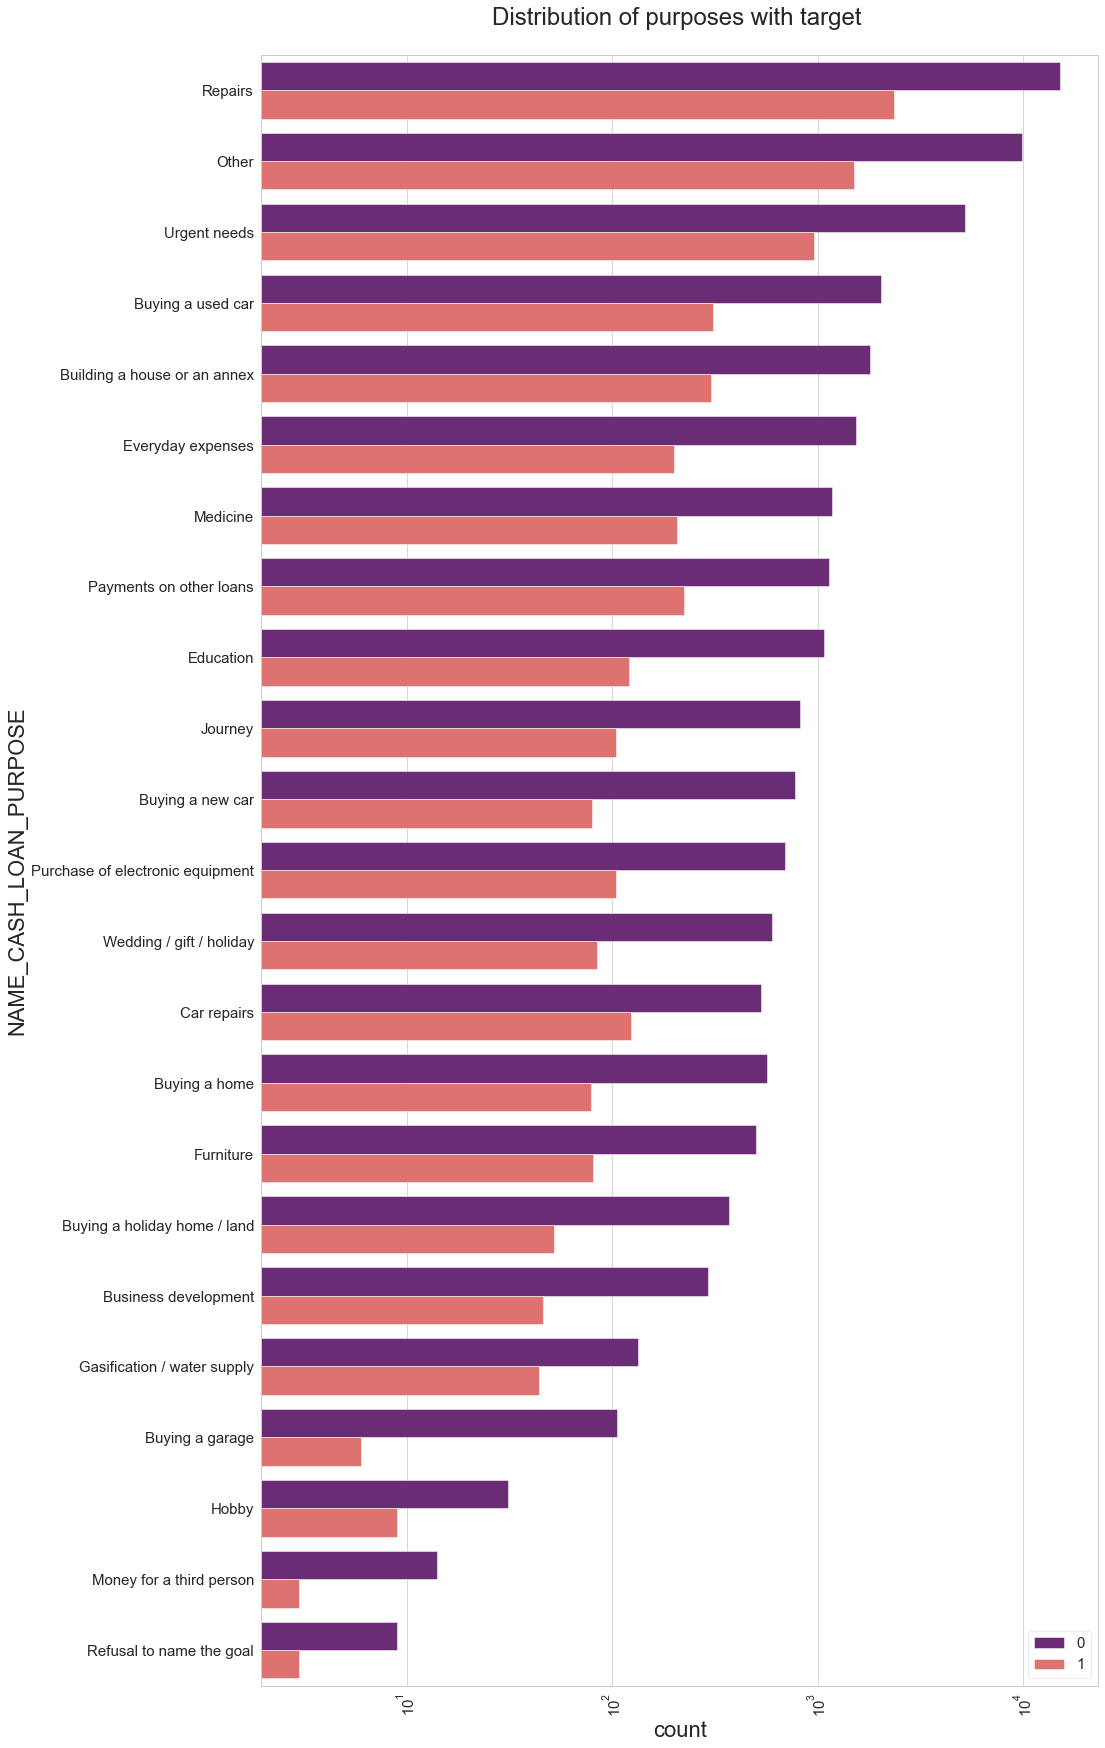

In [35]:
# Distribution of CASH_LOAN_PURPOSE
sns.set_style('whitegrid')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')
plt.legend(fontsize=15)

plt.show()

No such relevant inference can be derived from this graph.

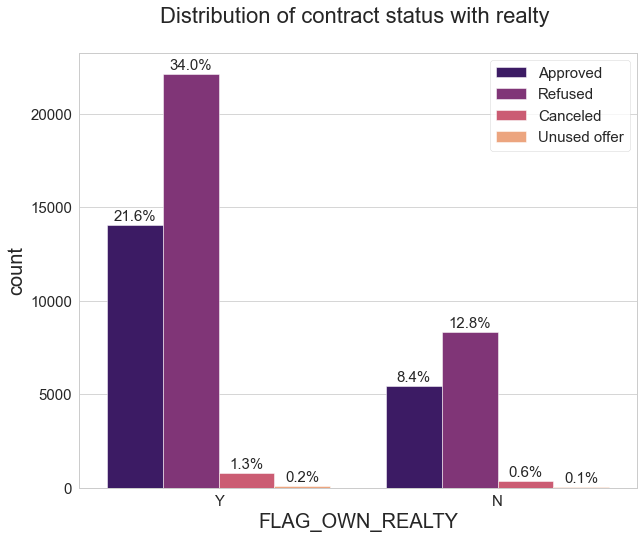

In [36]:
# Distribution of FLAG_OWN_REALTY
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
plt.title('Distribution of contract status with realty ')
ax = sns.countplot(data = new_data, x= 'FLAG_OWN_REALTY', 
                   order=new_data['FLAG_OWN_REALTY'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize = 15)
for p in ax.patches:
        #ax.annotate('{:.1f}%'.format((p.get_height()/len(new_data))*100), (p.get_x()+0.1, p.get_height()+50), size=15)
        
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(new_data), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Points to be concluded from above plot:

1. Rejection of loans are higher in people who owns a house, as compared to people who don't.
2. But at the same time, number of loan approvals are also higher in people who owns a house. So, we can say that the people who owns a 'house' apply for more loans as compared to people who don't.

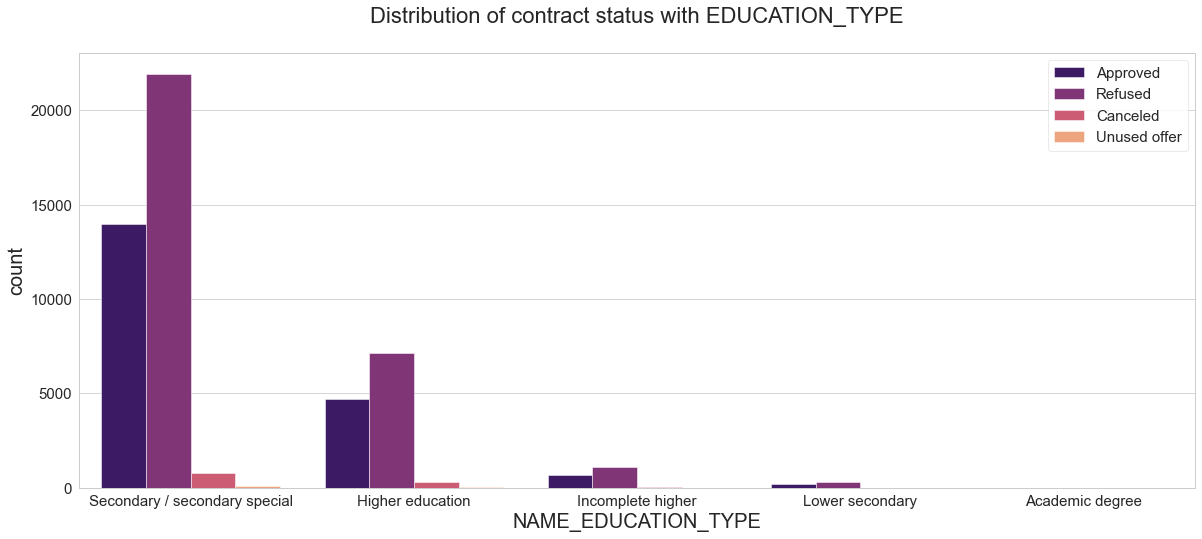

In [37]:
# Distribution of EDUCATION_TYPE
sns.set_style('whitegrid')

plt.figure(figsize=(20,8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
plt.title('Distribution of contract status with EDUCATION_TYPE')
ax = sns.countplot(data = new_data, x= 'NAME_EDUCATION_TYPE', 
                   order=new_data['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize = 15)
plt.show()

From the above graph, we can conclude that:

1. People with 'Secondary/Seconday Special' education type tend to apply for more loans and have greater percentage of loan refusal as compared to people with 'Higher Education'.
2. 'Incomplete Higher' & 'Lower Secondary' education type people do not apply for loans as such.

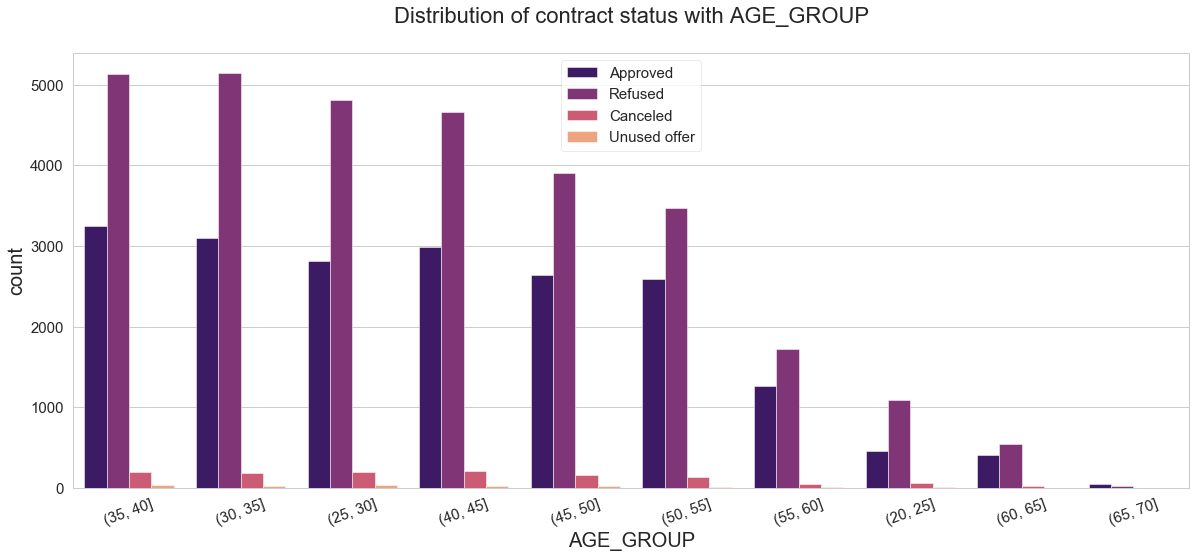

In [107]:
# Distribution of AGE_GROUP
sns.set_style('whitegrid')

plt.figure(figsize=(20,8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation = 20, fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
plt.title('Distribution of contract status with AGE_GROUP')
ax = sns.countplot(data = new_data, x='AGE_GROUP', 
                   order=new_data['AGE_GROUP'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize = 15)
plt.show()

From the graph, we can say that:

1. Customers from various AGE-GROUPS have higher count of application refusal than approval.
2. As we saw earlier, people in AGE GROUP of 25-30 showed higher hances of being a defaulter. Here from above plot we can see that this age-group have refusal count approx twice the approval count.
3. Also, 35-40 age group people were higher in non-defaulter's data. Here for the same age group we can see more than 3000 applications are approved and more than 5000 applications were refused.

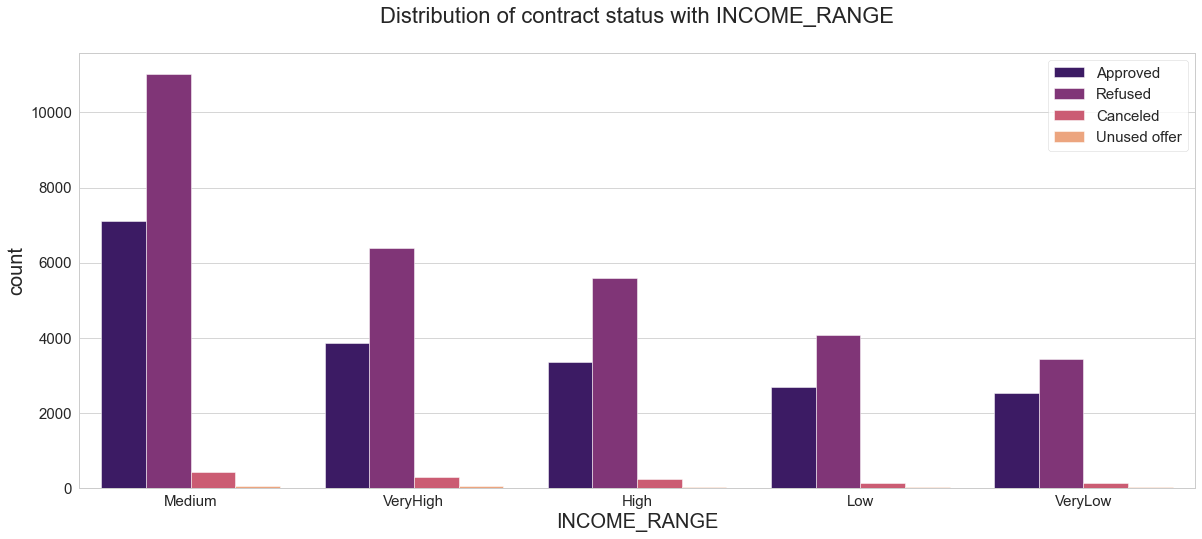

In [38]:
# Distribution of INCOME_RANGE
sns.set_style('whitegrid')

plt.figure(figsize=(20,8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
plt.title('Distribution of contract status with INCOME_RANGE')
ax = sns.countplot(data = new_data, x = 'INCOME_RANGE', 
                   order=new_data['INCOME_RANGE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize = 15)
plt.show()

From the above plot, we can say that:
    
1. Loan cancellation rate of each Income Range group is very low. Reason can be that they have appropriate documents for the amount of loan they are applying for.
2. People with Income Range 'Low' & 'Very Low' have less percentage gap between Loan approval & Loan refusal.
3. People with Income Range 'Medium' have greater percentage gap between Loan approval & Loan refusal, than any other Icome Range.

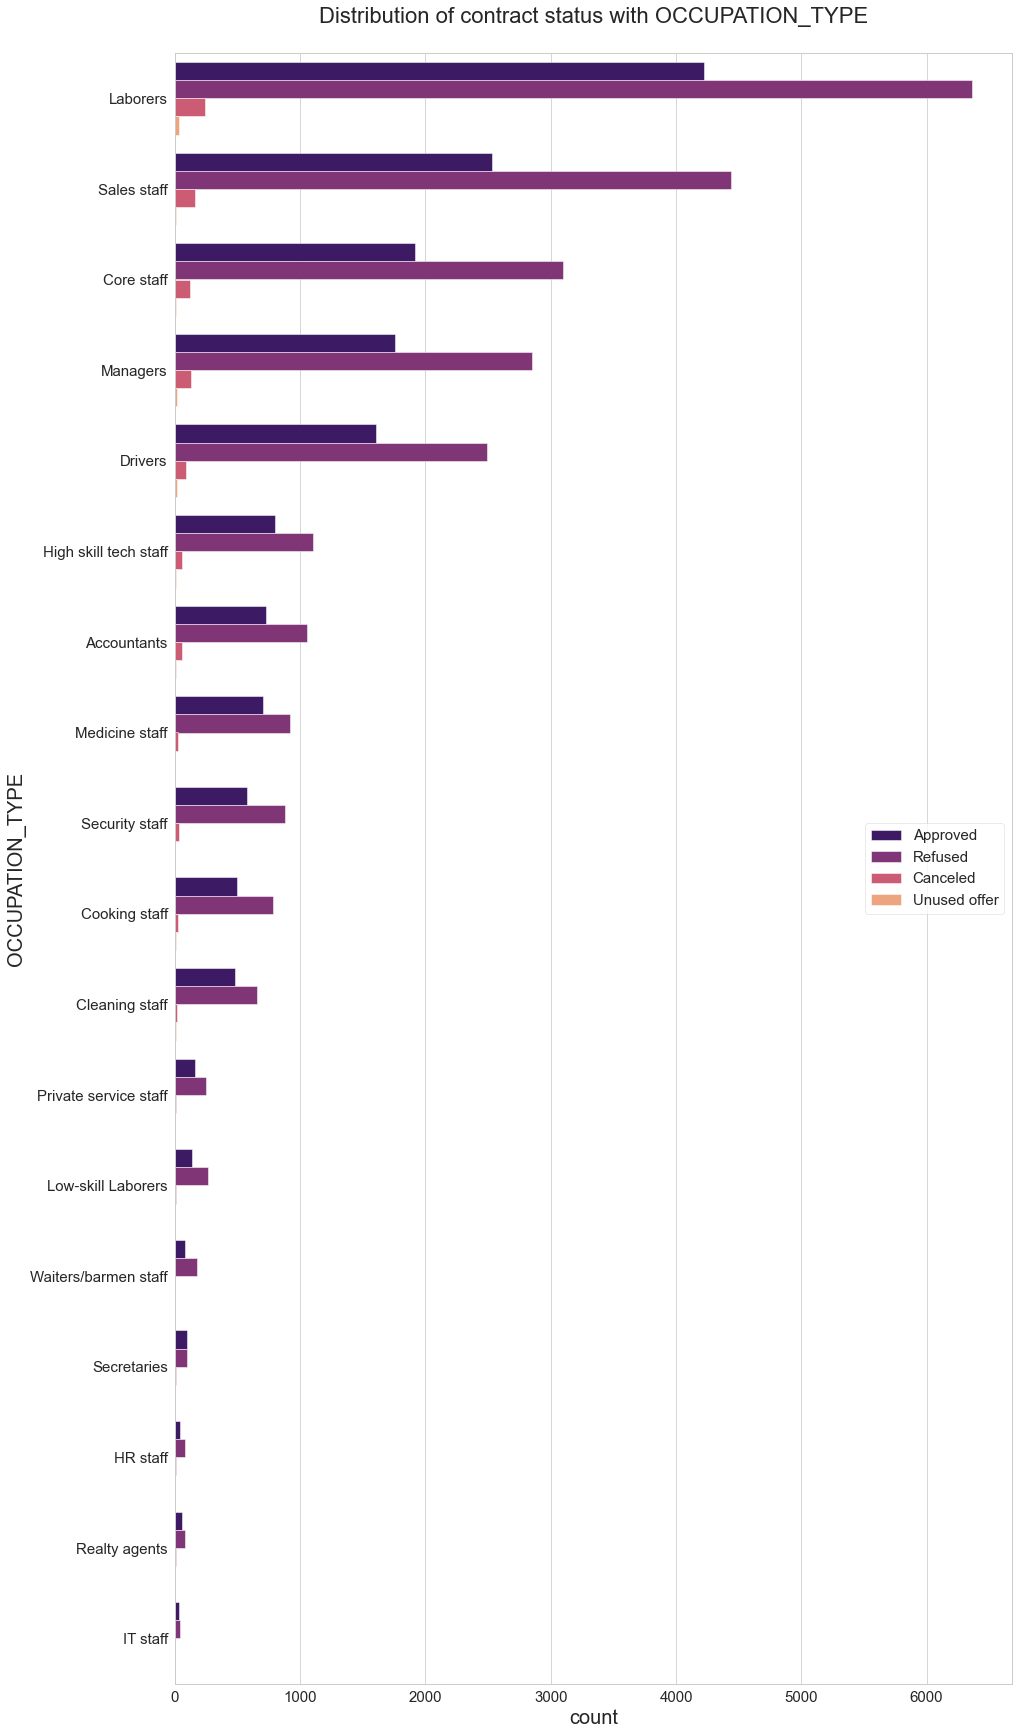

In [44]:
# Distribution of OCCUPATION_TYPE
sns.set_style('whitegrid')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.xscale('log')
plt.title('Distribution of contract status with OCCUPATION_TYPE')
ax = sns.countplot(data = new_data, y= 'OCCUPATION_TYPE', 
                   order=new_data['OCCUPATION_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.legend(fontsize = 15)
plt.show()

From above plot, we can conclude that:

1. 'Labourers' tend to apply for more loans and their Loan applications tend to refuse more too.
2. 'IT staff', 'Realty agents', 'HR staff', 'Secretaries' do not tend to apply for loans as such and their loan refusal rate is almost same as their loan approval rate.
3. 'High skill tech staff', Accountants' and 'Medicine staff' do not have much percentage gap between loan refusal and loan approval.

#### 3.3.3 Bivariate Analysis

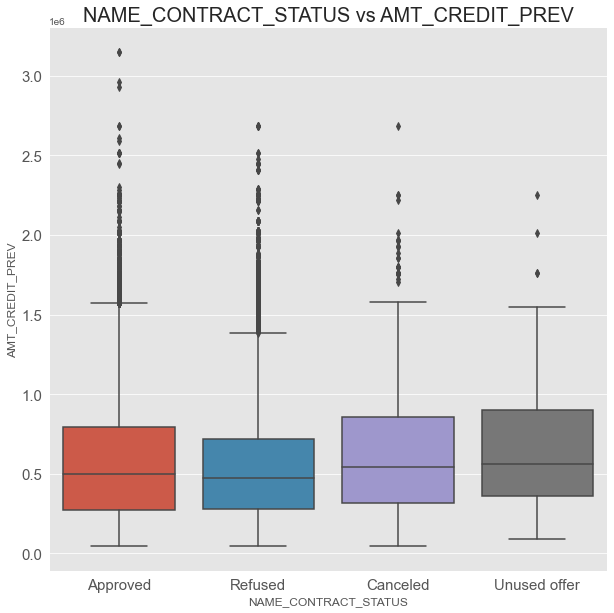

In [32]:
box_plot('NAME_CONTRACT_STATUS', 'AMT_CREDIT_PREV')

From the graph, we can conclude that:

1. High credit amount people have more Loan Approved applications.

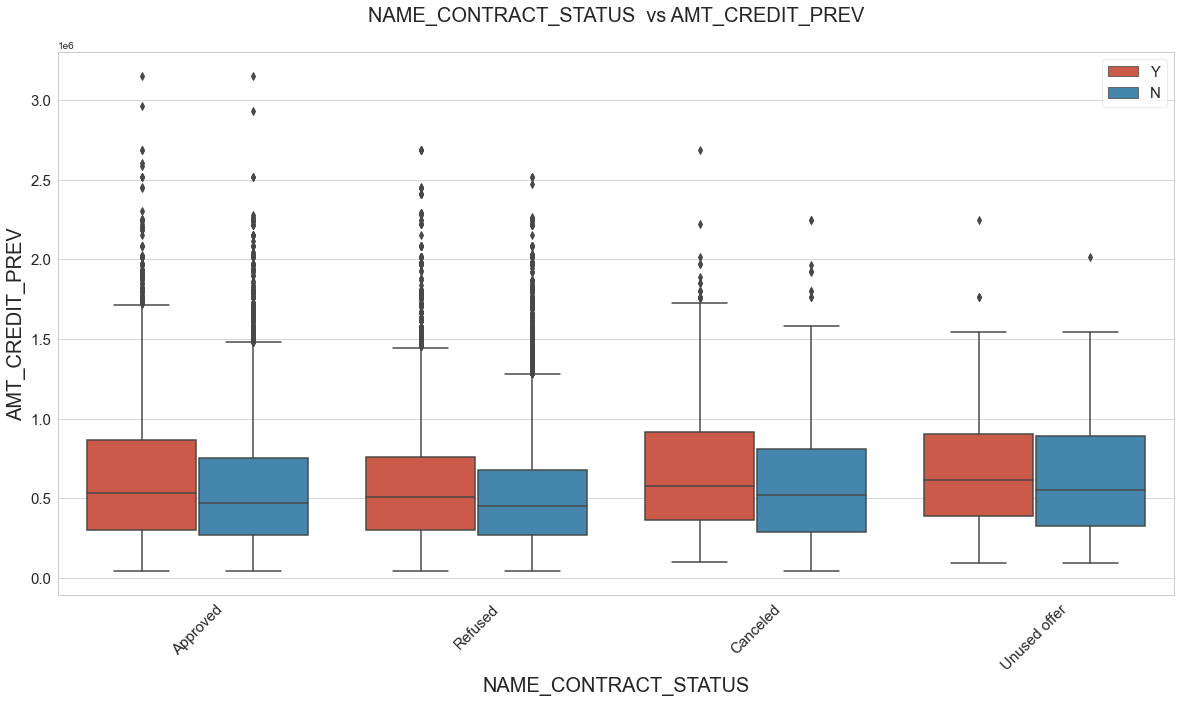

In [47]:
# Box plotting for Multivariate analysis

plt.figure(figsize=(20,10))

#plt.subplot(1,2,1)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
#plt.yscale('log')
sns.boxplot(data = new_data, x='NAME_CONTRACT_STATUS',y = 'AMT_CREDIT_PREV',hue='FLAG_OWN_CAR', orient='v')
plt.title('NAME_CONTRACT_STATUS  vs AMT_CREDIT_PREV', fontsize = 20)
plt.legend(fontsize=15)

plt.show()

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount

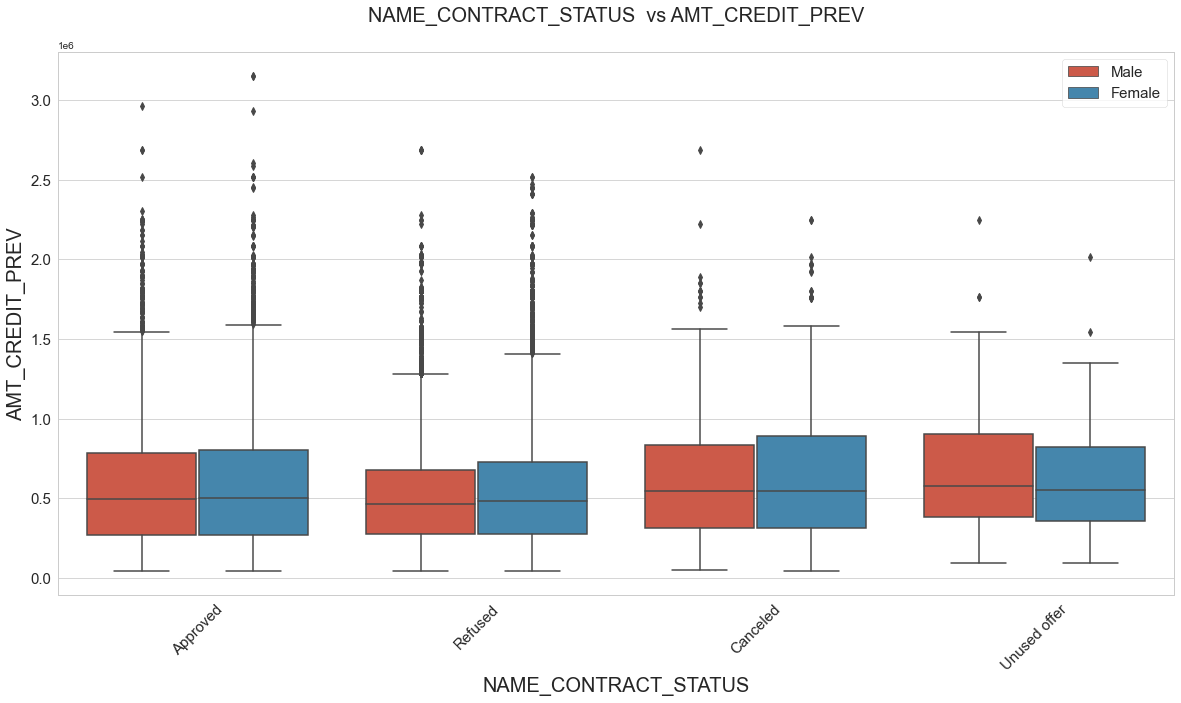

In [48]:
# Box plotting for Multivariate analysis

plt.figure(figsize=(20,10))

#plt.subplot(1,2,1)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
#plt.yscale('log')
sns.boxplot(data = new_data, x='NAME_CONTRACT_STATUS',y = 'AMT_CREDIT_PREV',hue='CODE_GENDER', orient='v')
plt.title('NAME_CONTRACT_STATUS  vs AMT_CREDIT_PREV', fontsize = 20)
plt.legend(fontsize=15)

plt.show()

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

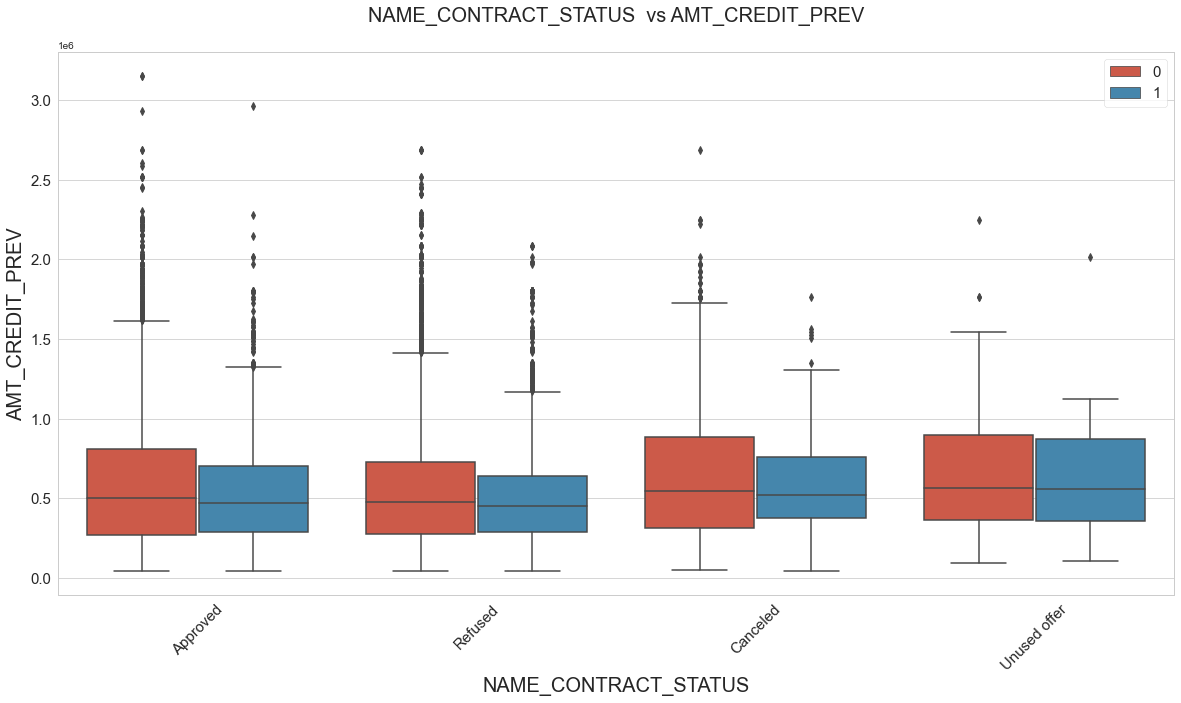

In [49]:
# Box plotting

plt.figure(figsize=(20,10))

#plt.subplot(1,2,1)
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
#plt.yscale('log')
sns.boxplot(data = new_data, x='NAME_CONTRACT_STATUS',y = 'AMT_CREDIT_PREV',hue='TARGET', orient='v')
plt.title('NAME_CONTRACT_STATUS  vs AMT_CREDIT_PREV', fontsize = 20)
plt.legend(fontsize=15)

plt.show()

From the above plot, we can conclude that:

1.  For every contract status, the count of non-defaulter customers is more as compared to defaulter customers.
2. The average of median values of every contract status is between 0.5 & 0.6

In [50]:
# Creating dataframes for each Contract Status type
approved = new_data[new_data.NAME_CONTRACT_STATUS == 'Approved']
refused = new_data[new_data.NAME_CONTRACT_STATUS == 'Refused']
canceled = new_data[new_data.NAME_CONTRACT_STATUS == 'Canceled']
unused_offer = new_data[new_data.NAME_CONTRACT_STATUS == 'Unused offer']

In [55]:
# Creating a function to plot, this helps with code reuse
def status_count_plot(col):

    #fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 2, nrows = 2, figsize = (25,5))
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    s1 = sns.countplot(x = approved[col], data = approved)
    plt.title('Approved', fontsize = 12)
    plt.xlabel('%s'%col, size = 12)
    plt.ylabel('Frequency of Loans', size = 12)
    s1.set_xticklabels(s1.get_xticklabels())
    
    plt.subplot(2,2,2)
    s2 = sns.countplot(x = refused[col], data = refused)
    plt.title('Refused', fontsize = 12)
    plt.xlabel('%s'%col, size = 12)
    plt.ylabel('Frequency of Loans', size = 12)
    s2.set_xticklabels(s2.get_xticklabels())
    
    plt.subplot(2,2,3)
    s3 = sns.countplot(x = canceled[col], data = canceled)
    plt.title('Canceled', fontsize = 12)
    plt.xlabel('%s'%col, size = 12)
    plt.ylabel('Frequency of Loans', size = 12)
    s3.set_xticklabels(s3.get_xticklabels())
    
    plt.subplot(2,2,4)
    s4 = sns.countplot(x = unused_offer[col], data = unused_offer)
    plt.title('Unused_offer', fontsize = 12)
    plt.xlabel('%s'%col, size = 12)
    plt.ylabel('Frequency of Loans', size = 12)
    s4.set_xticklabels(s4.get_xticklabels())
    
    plt.show()

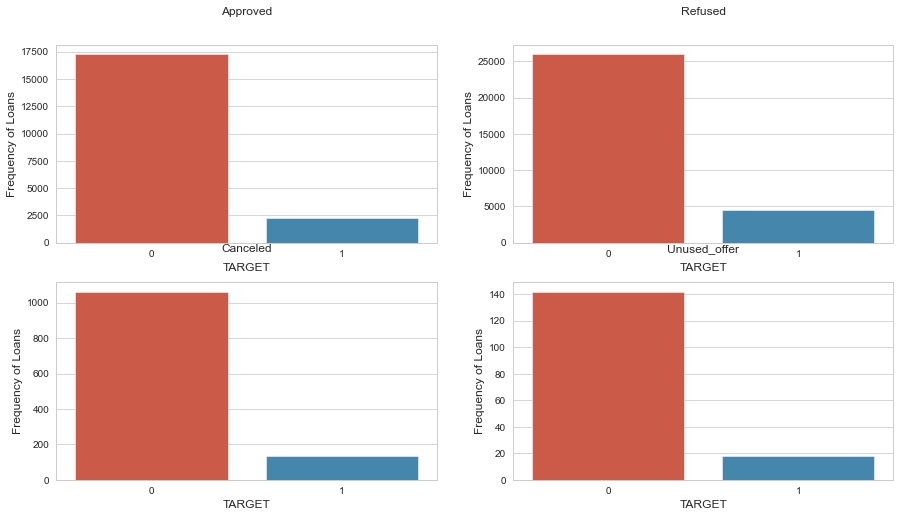

In [53]:
status_count_plot('TARGET')

In [51]:
# Checking numeric propotions to get a clearer idea 
print('Approved:\n',approved.TARGET.value_counts(normalize = True)*100)
print('Refused:\n',refused.TARGET.value_counts(normalize = True)*100)
print('Canceled:\n',canceled.TARGET.value_counts(normalize = True)*100)
print('Unused Offer:\n',unused_offer.TARGET.value_counts(normalize = True)*100)

Approved:
 0    88.257556
1    11.742444
Name: TARGET, dtype: float64
Refused:
 0    85.066212
1    14.933788
Name: TARGET, dtype: float64
Canceled:
 0    88.657214
1    11.342786
Name: TARGET, dtype: float64
Unused Offer:
 0    88.75
1    11.25
Name: TARGET, dtype: float64


Percentage of Defaulters(Target 1) for Refused Category is more.

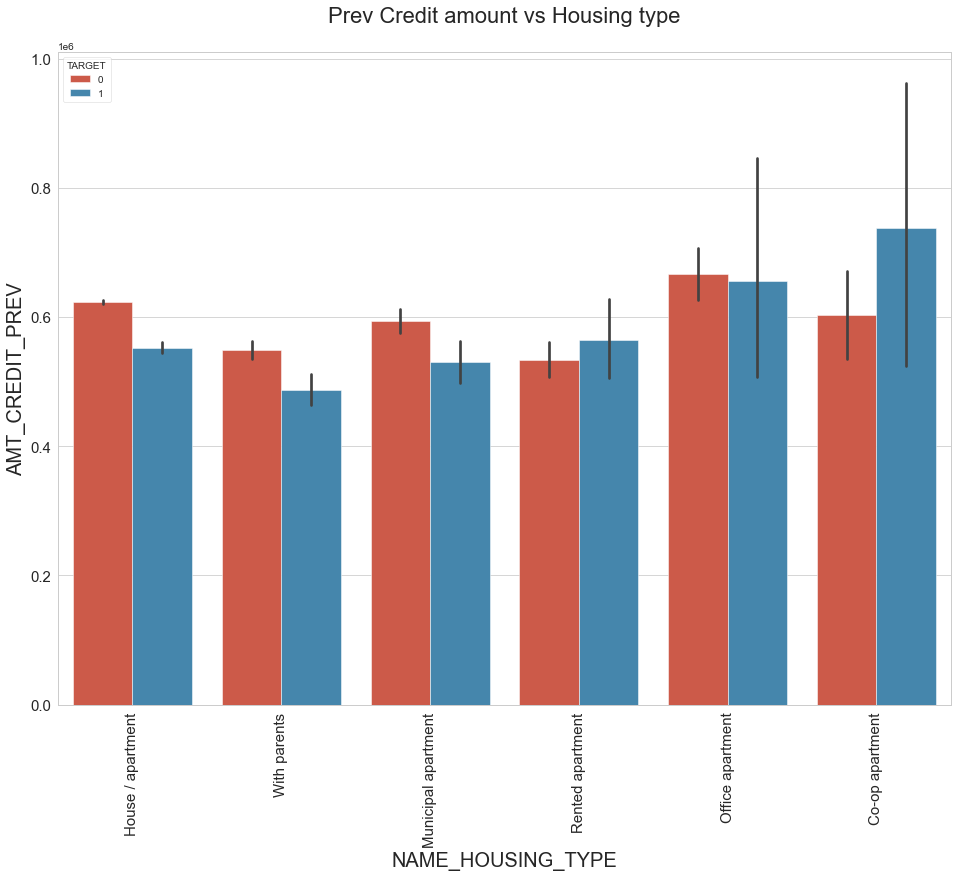

In [56]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90, size = 15)
plt.yticks(size = 15)
sns.barplot(data =new_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

From the above we can conclude some points-

1. Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target.
2. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 
3. Bank can focus mostly on housing type with parents or House\appartment or municipal appartment for successful payments.

## 6. Final Conclusion

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Clients from housing type ‘With parents’ or House\apartment or municipal apartment should be considered more as they are having least number of unsuccessful payments.

3. Customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan. We can also consider age group of 40 to 55, as they contribute more to non-defaulters.

4. Mostly people apply through 'Cash Loans' as compared to 'Revolving Loans' and also 'Cash Loans' have less default percentage too.

5. Loan applications from Clients with Secondary/ Secondary special as Education type can be approved after taking into account other factors like their Income Range.

6. Female clients tend to pay loan amount on time, thus banks can consider them while approving loans.

